In [902]:
# Importing all the necessary libraries

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [903]:
# Reading the csv file

leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [904]:
# Checking the shape of the dataset

leads.shape

(9240, 37)

In [905]:
# Describing the data to get an idea of the overall spread of data

leads.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


In [906]:
# Checking the column attributes of the data

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Cleaning the data

In [907]:
# Replacing the "Select" keywords with NaN values

leads = leads.replace('Select', np.nan)

Infrence- Since the data contains the keyword "select" to define non-selected options. We can replace the "select" keyword with NAN

### Handling Missing Values

In [908]:
# Checking for missing values

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [909]:
# Checking the percentage of missing values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [910]:
# Removing all the columns that have more than 40% missing values

leads = leads.drop(leads.loc[:,list(round(100*(leads.isnull().sum()/len(leads.index)), 2)>40)].columns, axis=1)

In [911]:
# Checking the percentage of missing values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Infrence- There are  a lot of missing values in the data. We will drop the columnswith missing values more than 40% and rest of the data we will used different techniques to impute the missing values

#### Dealing with Missing Values -  'City'

In [912]:
# Dealing with missing values in "City" column

leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

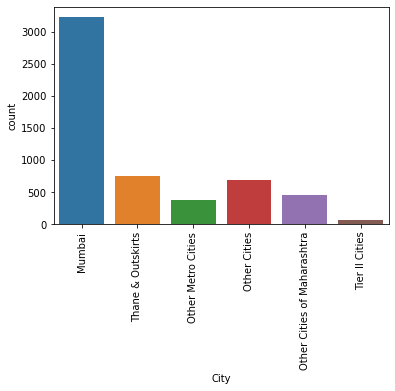

In [913]:
# Barplot of "City" column 

sns.countplot(leads.City)
plt.xticks(rotation=90)
plt.show()

In [914]:
# Checking the mode value of city column

leads.City.mode()

0    Mumbai
dtype: object

In [915]:
# Replacing Nan values with Mode "Mumbai"

leads.City= leads.City.fillna(leads.City.mode()[0])

In [916]:
leads.City.isnull().sum()

0

#### Dealing with Missing Values -  'Specialization'

In [917]:
# Dealing with missing values in Specialization column

leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

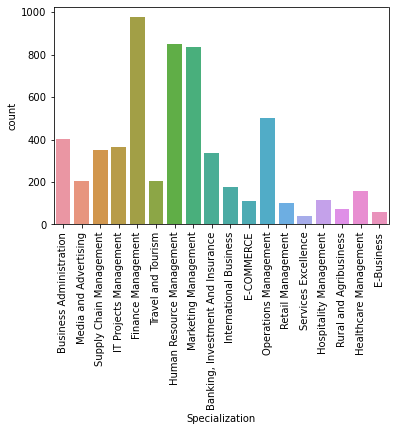

In [918]:
# Barplot of Specialization column

sns.countplot(leads.Specialization)
plt.xticks(rotation=90)
plt.show()

In [919]:
# Imputing the missing value with 'Not Mentioned'

leads.Specialization = leads.Specialization.replace(np.nan, 'Not Mentioned')


In [920]:
leads.Specialization.isnull().sum()

0

#### Dealing with Missing Values - 'What is your current occupation'

In [921]:
# Dealing with missing values in occupation column

leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

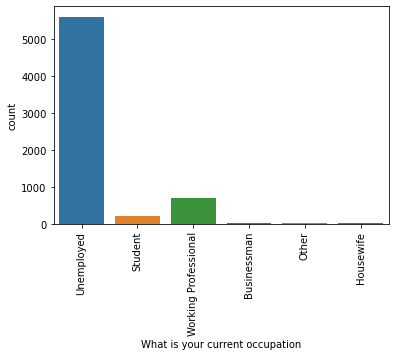

In [922]:
# Dealing with missing values in occupation column

sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [923]:
# Checking the mode value of occupation columns

leads['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [924]:
# replacing Nan values with Mode "Unemployed"

leads['What is your current occupation']= leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0])


In [925]:
leads['What is your current occupation'].isnull().sum()

0

In [926]:
leads.nunique()


Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

## Data columns that are not required

In [927]:
# Dropping columns that are generated by the Sales team 

leads.drop(['Tags','Last Notable Activity','Last Activity'],  axis=1, inplace=True)

Infence- These columns need to be dropped as the data for which is limited in nature

In [928]:
# Dropping prospect id because prospect id and the lead number is the same thing

leads.drop(['Prospect ID'],axis=1, inplace = True)


In [929]:
# Dropping columns with just one single value as 'No'

leads.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Magazine','Receive More Updates About Our Courses'],  axis=1, inplace=True)


# Dropping skewed data

In [930]:
print(leads['Do Not Email'].value_counts(normalize=True))

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64


In [931]:
print(leads['Do Not Call'].value_counts(normalize=True))

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64


In [932]:
print(leads['X Education Forums'].value_counts(normalize=True))

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64


In [933]:
print(leads['Newspaper'].value_counts(normalize=True))

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64


In [934]:
print(leads['Digital Advertisement'].value_counts(normalize=True))

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64


In [935]:
print(leads['Through Recommendations'].value_counts(normalize=True))

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64


In [936]:
print(leads['A free copy of Mastering The Interview'].value_counts(normalize=True))

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64


In [937]:
print(leads['Newspaper Article'].value_counts(normalize=True))

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64


In [938]:
print(leads['Search'].value_counts(normalize=True))

No     0.998485
Yes    0.001515
Name: Search, dtype: float64


In [939]:
leads['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Nigeria                 0.000590
Kuwait                  0.000590
Germany                 0.000590
South Africa            0.000590
Canada                  0.000590
Sweden                  0.000443
Philippines             0.000295
Belgium                 0.000295
Uganda                  0.000295
Netherlands             0.000295
Italy                   0.000295
Ghana                   0.000295
China                   0.000295
Asia/Pacific Region     0.000295
Bangladesh              0.000295
Tanzania                0.000148
Kenya                   0.000148
Malaysia  

In [940]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [941]:
# Dropping columns with 95% and above skewed data

leads.drop(['Do Not Email','Do Not Call','X Education Forums','Newspaper','Digital Advertisement', 'Through Recommendations','Newspaper Article','Search','Country','What matters most to you in choosing a course' ],  axis=1, inplace=True)


Infrence- We dropped allthe columns which had more than 95% of skewed data. Its always better to drop skewed daqta for better analysis

In [942]:
# Checking the percentage of missing values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
dtype: float64

In [943]:
# Dropping Missing Values

leads = leads.dropna()

 Inference-  Since that the missing values of some columns are less than 2%, we can drop them because its such a small percentage. Alse, dropping them wont affect them in any way. 

## Combining Categories

In [944]:
# Checking the number of categories of each columns

leads.nunique()

Lead Number                               9074
Lead Origin                                  4
Lead Source                                 21
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Specialization                              19
What is your current occupation              6
City                                         6
A free copy of Mastering The Interview       2
dtype: int64

Infrence- We will be cobining all the categories with low percentage of data for better data analysis

In [945]:
# Checking the value_counts

leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
blog                    1
youtubechannel          1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
testone                 1
Name: Lead Source, dtype: int64

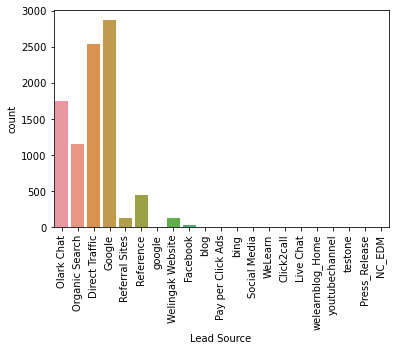

In [946]:
# Countplot for Lead Source

sns.countplot(leads['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [947]:
# Combining categories with less percentage into a single category 'Others'

leads['Lead Source'] = leads['Lead Source'].replace(['Click2call','bing','Social Media','Live Chat','WeLearn','Press_Release','Pay per Click Ads','testone','Welingak Website','Referral Sites','Facebook','bing','google','welearnblog_Home','blog','youtubechannel','NC_EDM'] ,'Others')  

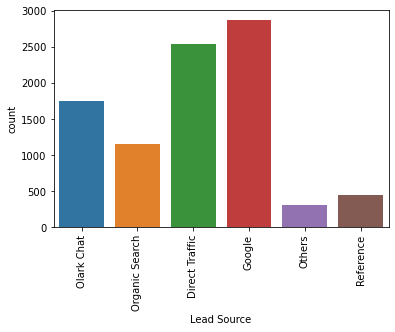

In [948]:
sns.countplot(leads['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [949]:
# checking Value counts for 'Specialization'

leads['Specialization'].value_counts()

Not Mentioned                        3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

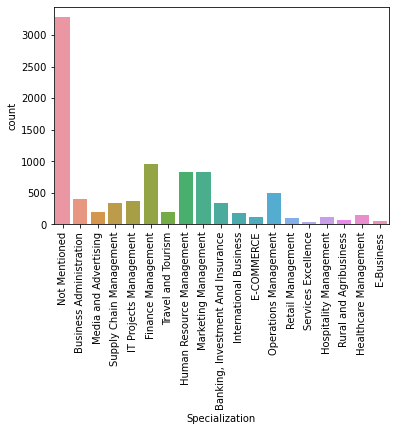

In [950]:
# Countplot for Specialization


sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [951]:
# Combining categories with less percentage into a single category 'Managment Courses'

leads['Specialization'] = leads['Specialization'].replace(['Operations Management','Business Administration','IT Projects Management','Supply Chain Management','Marketing Management','Human Resource Management','Finance Management','International Business','Healthcare Management','Hospitality Management','Retail Management'],' Managment Courses')

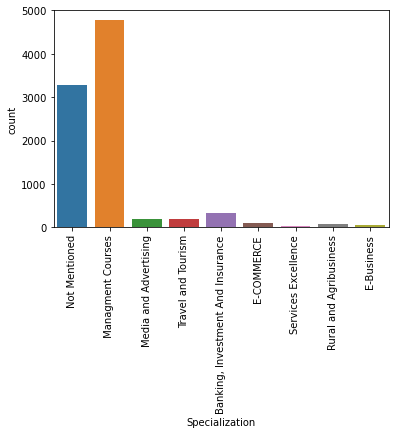

In [952]:
# Countplot for specialization

sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [953]:
# Checking the number of categories of each columns

leads.nunique()

Lead Number                               9074
Lead Origin                                  4
Lead Source                                  6
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1717
Page Views Per Visit                       114
Specialization                               9
What is your current occupation              6
City                                         6
A free copy of Mastering The Interview       2
dtype: int64

 Inference- We can now observe that all the categorical columns have now categories below 9.

## Numercal columns Analysis

In [954]:
# Describing the leads data

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Converterd percentage value


In [955]:
# Converterd percentage value

sum(leads.Converted)/len(leads.Converted.index)*100

37.85541106458012

Infrence- We can observe that 38% of the data got converted.

## Checking Outliers

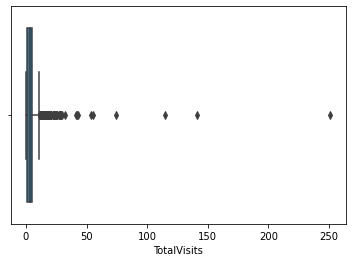

In [956]:
# Boxplot for Outliers 

sns.boxplot(leads.TotalVisits)
plt.show()

In [957]:
# Checking Percentiles values

leads.TotalVisits.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [958]:
# Dropping Outliers 

q1 = leads.TotalVisits.quantile(0.01)
q4 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= q4)]
leads = leads[(leads.TotalVisits >= q1)]

Infrence- We dropped all the columns with values more the 99 percentile and less than 1 percentile to get rid of  outliers

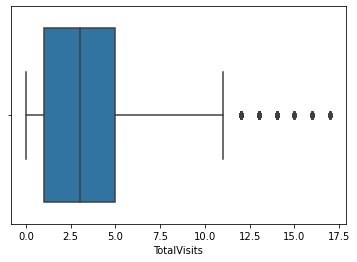

In [959]:
# Checking Boxplot

sns.boxplot(leads.TotalVisits)
plt.show()

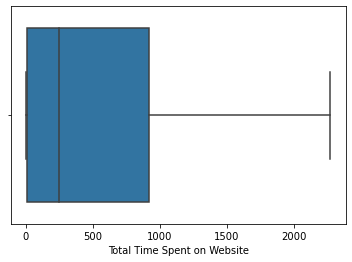

In [960]:
# Boxplot for 'Total Time Spent on Website'

sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

Inference- We can observe that there are no outliers present in the "Total Time spent on Website" column

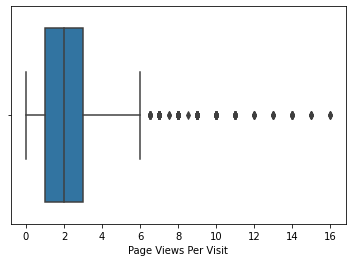

In [961]:
# Boxplot for 'Page Views Per Visit'

sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [962]:
# Dropping Outliers 

q1 = leads['Page Views Per Visit'].quantile(0.01)
q4 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads['Page Views Per Visit'] <= q4)]
leads = leads[(leads['Page Views Per Visit'] >= q1)]

Infrence- We dropped all the columns with values more the 99 percentile and less than 1 percentile to get rid of  outliers

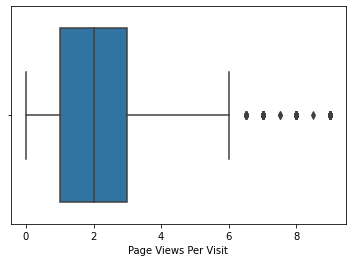

In [963]:
# Boxplot for 'Page Views Per Visit'

sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [964]:
# Checking the numberical analysis of the numberical columns

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8924.000000,8924.000000,8924.000000,8924.000000,8924.00000
mean,617039.166853,0.377521,3.153070,479.287875,2.27400
std,23333.176791,0.484794,2.903138,544.381711,1.89403
min,579533.000000,0.000000,0.000000,0.000000,0.00000
25%,596416.750000,0.000000,1.000000,7.000000,1.00000
50%,615405.500000,0.000000,3.000000,242.000000,2.00000
75%,637156.750000,1.000000,5.000000,914.000000,3.00000
max,660737.000000,1.000000,17.000000,2272.000000,9.00000


In [965]:
leads.shape

(8924, 11)

In [966]:
## data percentage after cleaning
8924/9240 * 100

96.58008658008657

Infrence- We can observe that we still have got 95% of data left with us after data cleaning and processing

In [967]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Not Mentioned,Unemployed,Mumbai,No
1,660728,API,Organic Search,0,5.0,674,2.5,Not Mentioned,Unemployed,Mumbai,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Managment Courses,Student,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Not Mentioned,Unemployed,Mumbai,No


### EDA(Exploratory Data Analysis)

### Univariate Analysis

In [968]:
# Analysing the coulmns that could help us in creating an efficient and accurate model

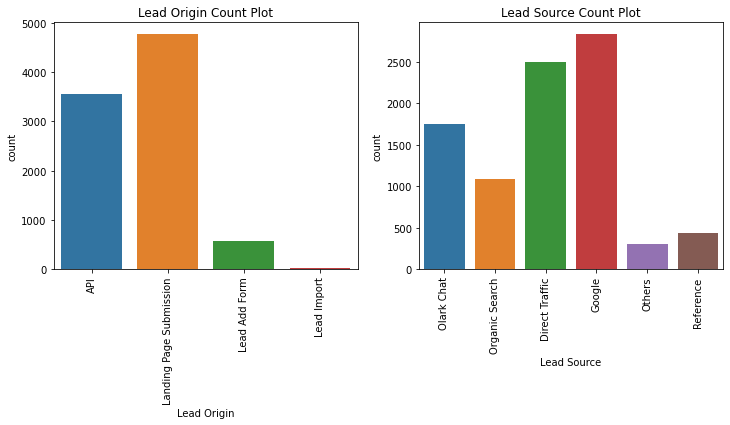

In [969]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.countplot(leads["Lead Origin"])
plt.title("Lead Origin Count Plot")
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(leads["Lead Source"])
plt.title("Lead Source Count Plot")
plt.xticks(rotation = 90)

plt.show()

In [970]:
# In the Lead Origin Count Plot we can notice that there is a huge number of landing page submissions followed by api
# In the Lead Source Count Plot we can notice that the major source of traffic is from Google followed by Direct Traffic

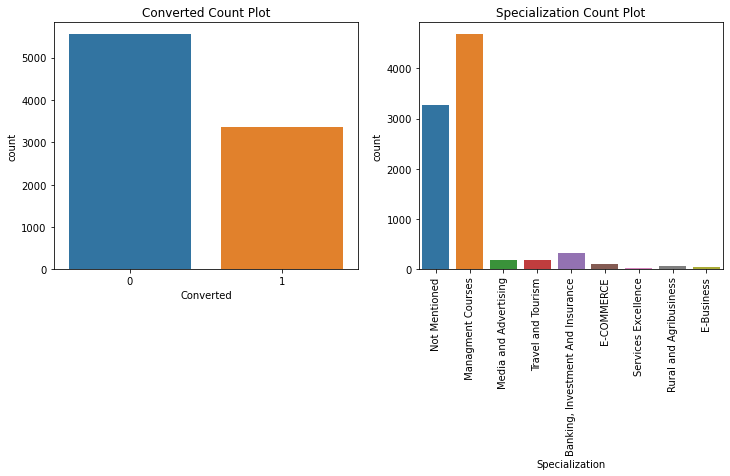

In [971]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.countplot(leads["Converted"])
plt.title("Converted Count Plot")

plt.subplot(2,2,2)
sns.countplot(leads["Specialization"])
plt.title("Specialization Count Plot")
plt.xticks(rotation = 90)


plt.show()

Infrence

1) In the Converted Count Plot we can notice that there almost twice the number of people who have not converted. There are a total of around 39% conversion rate

2) Most of the customers have a specialization in Management Courses


### Multivariate Analysis

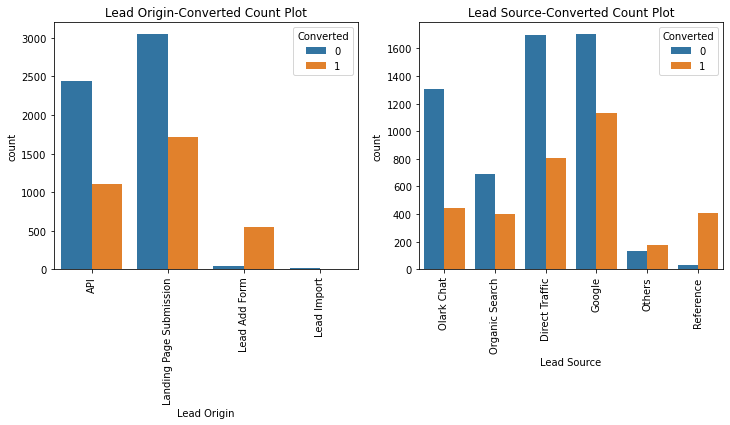

In [972]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)
plt.title("Lead Origin-Converted Count Plot")
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
plt.title("Lead Source-Converted Count Plot")
plt.xticks(rotation = 90)

plt.show()

Infrence

1) In the Lead Origin Count Plot we can notice that most of the leads got converted at landing page submission category followed by API.

2) In the Lead Source Count Plot we can notice that most of the leads got converted at by Goggle followed by Direct Traffic



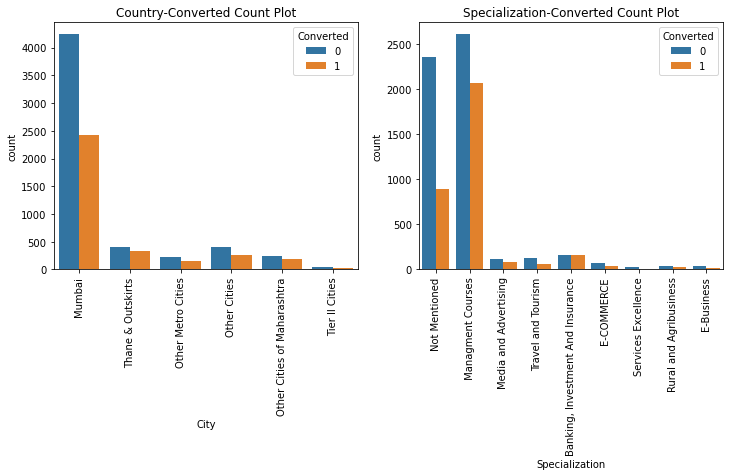

In [973]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.countplot(x = "City", hue = "Converted", data = leads)
plt.title("Country-Converted Count Plot")
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = "Specialization", hue = "Converted", data = leads)
plt.title("Specialization-Converted Count Plot")
plt.xticks(rotation = 90)

plt.show()

Infrence

1) In the City converted Count Plot we can notice that most of the leads got converted by customers from Mumbai.

2) In the specialization  Count Plot we can notice that most of the customers have a specialization in Management Courses


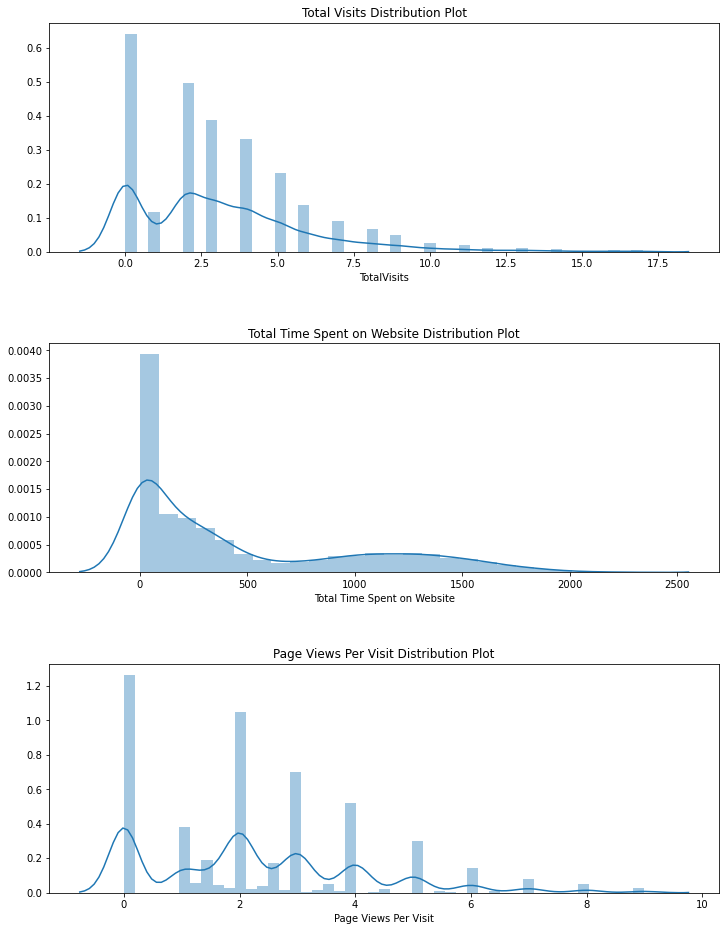

In [974]:
# Creating a distplot to visualize the distribution of numerical data

plt.figure(figsize = (12,16))
plt.subplots_adjust(hspace = 0.4)

plt.subplot(3,1,1)
sns.distplot(leads["TotalVisits"])
plt.title("Total Visits Distribution Plot")

plt.subplot(3,1,2)
sns.distplot(leads["Total Time Spent on Website"])
plt.title("Total Time Spent on Website Distribution Plot")


plt.subplot(3,1,3)
sns.distplot(leads["Page Views Per Visit"])
plt.title("Page Views Per Visit Distribution Plot")

plt.show()

Infrence

1) The maximum number of visits made by a customer to the website is of around 17 visits.

2) The maximum total time spent by a customer on the website is around 2272.

3) The maximum page views by customer is found to be around 9 views.


# Creating Dummy Variables

In [975]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             8924 non-null   int64  
 1   Lead Origin                             8924 non-null   object 
 2   Lead Source                             8924 non-null   object 
 3   Converted                               8924 non-null   int64  
 4   TotalVisits                             8924 non-null   float64
 5   Total Time Spent on Website             8924 non-null   int64  
 6   Page Views Per Visit                    8924 non-null   float64
 7   Specialization                          8924 non-null   object 
 8   What is your current occupation         8924 non-null   object 
 9   City                                    8924 non-null   object 
 10  A free copy of Mastering The Interview  8924 non-null   obje

In [976]:
# List of columns to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [977]:
# getting dummies and dropping the first column

dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

#concating results to the main "Leads" dataframe

leads = pd.concat([leads,dummy],1)

In [978]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.


# Creating dummy variables for the variable 'Specialization'
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
# Dropping 'Specialization_Not Mentioned' column
dummy = dummy.drop(['Specialization_Not Mentioned'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis = 1)


# Creating dummy variables for the variable 'Specialization'
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
# Dropping 'Specialization_Not Mentioned' column
dummy = dummy.drop(['Lead Source_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis = 1)

#### Dropping repeated variables

In [979]:
leads = leads.drop(['Lead Origin', 'City', 'Lead Source', 'Specialization', 'What is your current occupation'], 1)

### Final DataFrame for Model Building

In [980]:
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_ Managment Courses,"Specialization_Banking, Investment And Insurance",Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [981]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           8924 non-null   int64  
 1   Converted                                             8924 non-null   int64  
 2   TotalVisits                                           8924 non-null   float64
 3   Total Time Spent on Website                           8924 non-null   int64  
 4   Page Views Per Visit                                  8924 non-null   float64
 5   A free copy of Mastering The Interview                8924 non-null   int64  
 6   Lead Origin_Landing Page Submission                   8924 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8924 non-null   uint8  
 8   Lead Origin_Lead Import                               8924

In [982]:
# Checking the shape of the dummy variables

leads.shape

(8924, 32)

In [983]:
# Looking for null values in the dummy variables

leads.isnull().sum()

Lead Number                                             0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
A free copy of Mastering The Interview                  0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
What is your current occupation_Housewife               0
What is your current occupation_Other                   0
What is your current occupation_Student                 0
What is your current occupation_Unemployed              0
What is your current occupation_Working Professional    0
City_Other Cities                                       0
City_Other Cities of Maharashtra                        0
City_Other Metro Cities                                 0
City_Thane & O

## Model building 

#### Train-Test Split


In [984]:
# Importing the test_train_split package from sklearn.model_selection

from sklearn.model_selection import train_test_split

In [985]:
# Putting response variable to y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [986]:
# Putting feature variable to X

X=leads.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_ Managment Courses,"Specialization_Banking, Investment And Insurance",Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [987]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [988]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_ Managment Courses,"Specialization_Banking, Investment And Insurance",Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference
6676,-0.049636,1.395668,0.395289,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6138,0.297929,0.609686,0.926758,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8650,-0.049636,1.178657,0.395289,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3423,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6552,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Feature Selection Using RFE

In [989]:
# Importing the statsmodels package

import statsmodels.api as sm

In [990]:
# Importing the LogisticRegression package and initiating it as logreg

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [991]:
# Importinh the RFE package from sklearn.feature_selection

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [992]:
rfe.support_

array([False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True, False, False])

In [993]:
# Creating a list of all the columns

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('A free copy of Mastering The Interview', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 3),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 12),
 ('City_Other Cities of Maharashtra', False, 7),
 ('City_Other Metro Cities', False, 11),
 ('City_Thane & Outskirts', False, 13),
 ('City_Tier II Cities', False, 16),
 ('Specialization_ Managment Courses', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specializatio

In [994]:
# list of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_ Managment Courses',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness', 'Lead Source_Olark Chat'],
      dtype='object')

In [995]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'What is your current occupation_Other', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference'],
      dtype='object')

### Looking at Correlations

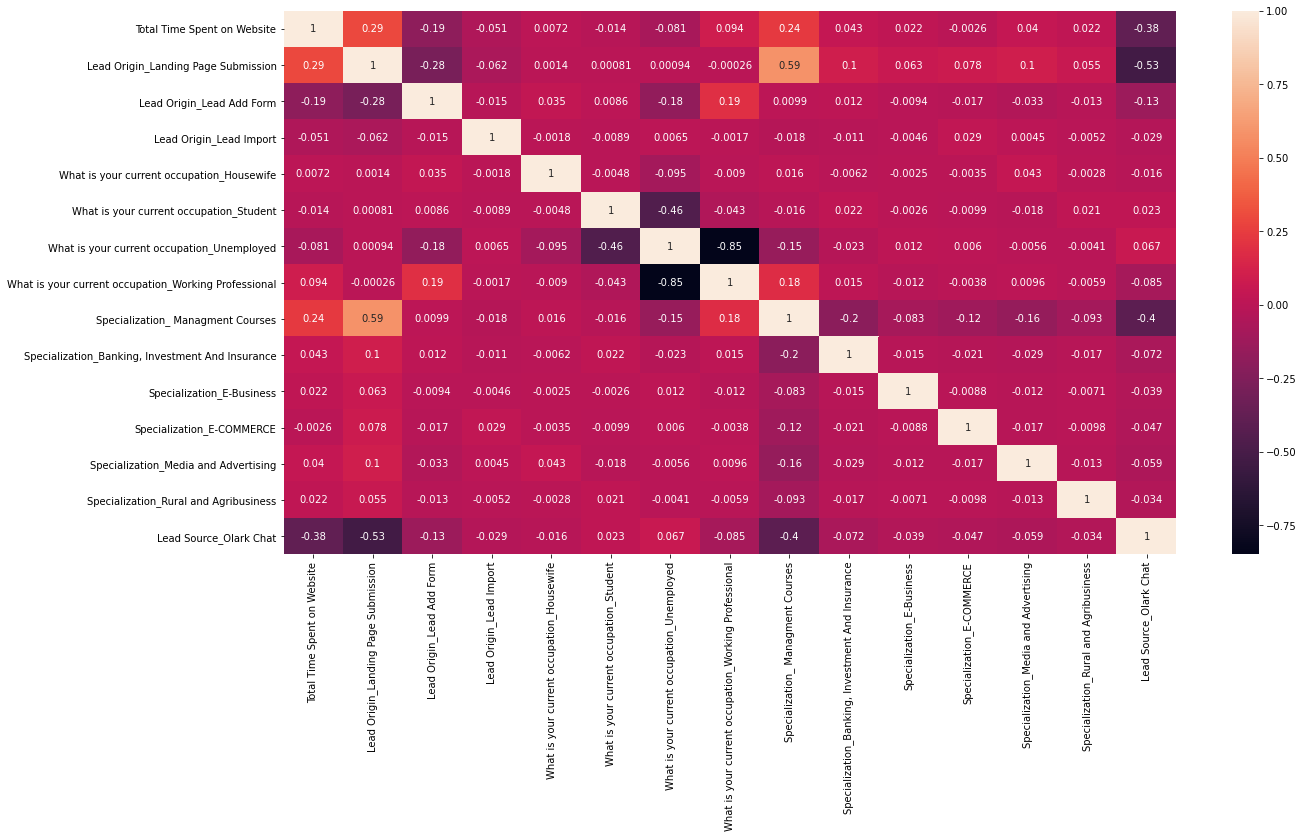

In [996]:
# Let's see the correlation matrix 

plt.figure(figsize = (20,10))

sns.heatmap(leads[col].corr(),annot = True)
plt.show()

Inference- We can obserrve that unemployes and working professionals have high correlation. so one of the variable needs to be dropped to avoid multicolinierity 


#### Dropping highly correlated  variables

In [997]:
# Dropping column with high correlation

col = col.drop('What is your current occupation_Working Professional',1)

###  Model Building

In [998]:
# Model 1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2981.4
Date:                Mon, 07 Dec 2020   Deviance:                       5962.7
Time:                        22:16:22   Pearson chi2:                 6.83e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.2599      0.183      6.871      0.000       0.900       1.619
Total Time Spent on Website                          1.1098      0.038     29.300      0.000       1.036       1.184
Lead Origin_Landing Page Submission                 -0.7822      0.112     -6.957      0.000      -1.003      -0.562
Lead Origin_Lead Add Form                            4.0776      0.218     18.696      0.000       3.650       4.505
Lead Origin_Lead Import                              0.8541      0.495      1.725      0.084      -0.116       1.824
What is your current occupation_Housewife           20.3276   1.62e+04      0.001      0.999   -3.17e+04    3.18e+04
What is your current occupation_Student             -2.5522      0.272     -9.385      0.000      -3.085      -2.019
What is your current occupation_Unemployed          -2.5163      0.170    -14.761      0.000      -2.850      -2.182
Specialization_ Managment Courses                    0.9211      0.106      8.655      0.000       0.713       1.130
Specialization_Banking, Investment And Insurance     1.2810      0.194      6.609      0.000       0.901       1.661
Specialization_E-Business                            0.7272      0.408      1.784      0.074      -0.072       1.526
Specialization_E-COMMERCE                            0.9000      0.294      3.061      0.002       0.324       1.476
Specialization_Media and Advertising                 1.0357      0.233      4.439      0.000       0.578       1.493
Specialization_Rural and Agribusiness                0.7999      0.385      2.076      0.038       0.045       1.555
Lead Source_Olark Chat                               0.7890      0.110      7.186      0.000       0.574       1.004
====================================================================================================================
"""

In [999]:
# Dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

In [1000]:
# Model 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2982.1
Date:                Mon, 07 Dec 2020   Deviance:                       5964.3
Time:                        22:16:22   Pearson chi2:                 6.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.2777      0.183      6.975      0.000       0.919       1.637
Total Time Spent on Website                          1.1095      0.038     29.298      0.000       1.035       1.184
Lead Origin_Landing Page Submission                 -0.7815      0.112     -6.949      0.000      -1.002      -0.561
Lead Origin_Lead Add Form                            4.0774      0.218     18.694      0.000       3.650       4.505
Lead Origin_Lead Import                              0.8539      0.495      1.725      0.085      -0.117       1.824
What is your current occupation_Student             -2.5701      0.272     -9.455      0.000      -3.103      -2.037
What is your current occupation_Unemployed          -2.5343      0.170    -14.885      0.000      -2.868      -2.201
Specialization_ Managment Courses                    0.9210      0.106      8.652      0.000       0.712       1.130
Specialization_Banking, Investment And Insurance     1.2802      0.194      6.605      0.000       0.900       1.660
Specialization_E-Business                            0.7262      0.408      1.781      0.075      -0.073       1.525
Specialization_E-COMMERCE                            0.8985      0.294      3.055      0.002       0.322       1.475
Specialization_Media and Advertising                 1.0347      0.233      4.435      0.000       0.577       1.492
Specialization_Rural and Agribusiness                0.7992      0.385      2.073      0.038       0.044       1.555
Lead Source_Olark Chat                               0.7885      0.110      7.181      0.000       0.573       1.004
====================================================================================================================
"""

In [1001]:
# Dropping column with high p-value

col = col.drop('Lead Origin_Lead Import',1)

In [1002]:
# Model 3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2983.5
Date:                Mon, 07 Dec 2020   Deviance:                       5967.0
Time:                        22:16:22   Pearson chi2:                 6.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.2895      0.183      7.047      0.000       0.931       1.648
Total Time Spent on Website                          1.1041      0.038     29.303      0.000       1.030       1.178
Lead Origin_Landing Page Submission                 -0.8055      0.112     -7.213      0.000      -1.024      -0.587
Lead Origin_Lead Add Form                            4.0554      0.218     18.631      0.000       3.629       4.482
What is your current occupation_Student             -2.5699      0.272     -9.456      0.000      -3.103      -2.037
What is your current occupation_Unemployed          -2.5324      0.170    -14.877      0.000      -2.866      -2.199
Specialization_ Managment Courses                    0.9339      0.106      8.778      0.000       0.725       1.142
Specialization_Banking, Investment And Insurance     1.2900      0.194      6.658      0.000       0.910       1.670
Specialization_E-Business                            0.7397      0.407      1.816      0.069      -0.059       1.538
Specialization_E-COMMERCE                            0.9336      0.294      3.179      0.001       0.358       1.509
Specialization_Media and Advertising                 1.0531      0.233      4.517      0.000       0.596       1.510
Specialization_Rural and Agribusiness                0.8091      0.385      2.100      0.036       0.054       1.564
Lead Source_Olark Chat                               0.7688      0.109      7.052      0.000       0.555       0.983
====================================================================================================================
"""

In [1003]:
# Dropping column with high p-value

col = col.drop('Specialization_E-Business',1)

In [1004]:
# Model 4

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2985.1
Date:                Mon, 07 Dec 2020   Deviance:                       5970.1
Time:                        22:16:23   Pearson chi2:                 6.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.3020      0.183      7.128      0.000       0.944       1.660
Total Time Spent on Website                          1.1060      0.038     29.353      0.000       1.032       1.180
Lead Origin_Landing Page Submission                 -0.7674      0.109     -7.011      0.000      -0.982      -0.553
Lead Origin_Lead Add Form                            4.0646      0.217     18.690      0.000       3.638       4.491
What is your current occupation_Student             -2.5719      0.272     -9.472      0.000      -3.104      -2.040
What is your current occupation_Unemployed          -2.5360      0.170    -14.915      0.000      -2.869      -2.203
Specialization_ Managment Courses                    0.8914      0.104      8.611      0.000       0.689       1.094
Specialization_Banking, Investment And Insurance     1.2475      0.192      6.493      0.000       0.871       1.624
Specialization_E-COMMERCE                            0.8909      0.293      3.046      0.002       0.318       1.464
Specialization_Media and Advertising                 1.0100      0.232      4.355      0.000       0.555       1.465
Specialization_Rural and Agribusiness                0.7675      0.384      1.997      0.046       0.014       1.521
Lead Source_Olark Chat                               0.7675      0.109      7.049      0.000       0.554       0.981
====================================================================================================================
"""

Infrence- We can observe that all the p-values are below 5% which is a good number. we can now go and check the VIF value to see if there is any correlationg between these variables


#### Checking VIF

In [1007]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1008]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,5.78
5,Specialization_ Managment Courses,4.54
4,What is your current occupation_Unemployed,3.64
10,Lead Source_Olark Chat,1.92
2,Lead Origin_Lead Add Form,1.36
0,Total Time Spent on Website,1.26
6,"Specialization_Banking, Investment And Insurance",1.24
8,Specialization_Media and Advertising,1.15
7,Specialization_E-COMMERCE,1.10
3,What is your current occupation_Student,1.08


Infrence- The cutoff we take for VIF in this case is 5% for VIF. Hence Lead Origin_Landing Page Submission	needs to be dropped because of high VIF value of 5.78%

In [1009]:
#dropping column with high VIF

col = col.drop('Lead Origin_Landing Page Submission',1)

In [1010]:
# Model 5

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3010.0
Date:                Mon, 07 Dec 2020   Deviance:                       6020.1
Time:                        22:16:32   Pearson chi2:                 6.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.1164      0.180      6.219      0.000       0.765       1.468
Total Time Spent on Website                          1.1163      0.038     29.693      0.000       1.043       1.190
Lead Origin_Lead Add Form                            4.4445      0.210     21.142      0.000       4.032       4.857
What is your current occupation_Student             -2.6373      0.268     -9.845      0.000      -3.162      -2.112
What is your current occupation_Unemployed          -2.5679      0.168    -15.301      0.000      -2.897      -2.239
Specialization_ Managment Courses                    0.4286      0.078      5.463      0.000       0.275       0.582
Specialization_Banking, Investment And Insurance     0.7856      0.179      4.401      0.000       0.436       1.136
Specialization_E-COMMERCE                            0.4139      0.281      1.470      0.141      -0.138       0.966
Specialization_Media and Advertising                 0.5293      0.222      2.387      0.017       0.095       0.964
Specialization_Rural and Agribusiness                0.3203      0.373      0.858      0.391      -0.412       1.052
Lead Source_Olark Chat                               1.0599      0.102     10.404      0.000       0.860       1.260
====================================================================================================================
"""

In [1011]:
#dropping column with high p-value

col = col.drop('Specialization_E-COMMERCE',1)

In [1012]:
# Model 6

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3011.1
Date:                Mon, 07 Dec 2020   Deviance:                       6022.2
Time:                        22:16:34   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.1447      0.178      6.416      0.000       0.795       1.494
Total Time Spent on Website                          1.1141      0.038     29.684      0.000       1.041       1.188
Lead Origin_Lead Add Form                            4.4307      0.210     21.111      0.000       4.019       4.842
What is your current occupation_Student             -2.6466      0.268     -9.891      0.000      -3.171      -2.122
What is your current occupation_Unemployed          -2.5737      0.168    -15.336      0.000      -2.903      -2.245
Specialization_ Managment Courses                    0.4078      0.077      5.296      0.000       0.257       0.559
Specialization_Banking, Investment And Insurance     0.7648      0.178      4.301      0.000       0.416       1.113
Specialization_Media and Advertising                 0.5081      0.221      2.297      0.022       0.075       0.942
Specialization_Rural and Agribusiness                0.2997      0.373      0.803      0.422      -0.432       1.031
Lead Source_Olark Chat                               1.0393      0.101     10.321      0.000       0.842       1.237
====================================================================================================================
"""

In [1013]:
#dropping column with high p-value

col = col.drop('Specialization_Rural and Agribusiness',1)

In [1014]:
# Model 7

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6237
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3011.4
Date:                Mon, 07 Dec 2020   Deviance:                       6022.8
Time:                        22:16:35   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.1549      0.178      6.492      0.000       0.806       1.504
Total Time Spent on Website                          1.1144      0.038     29.695      0.000       1.041       1.188
Lead Origin_Lead Add Form                            4.4267      0.210     21.102      0.000       4.016       4.838
What is your current occupation_Student             -2.6470      0.267     -9.897      0.000      -3.171      -2.123
What is your current occupation_Unemployed          -2.5755      0.168    -15.352      0.000      -2.904      -2.247
Specialization_ Managment Courses                    0.3996      0.076      5.240      0.000       0.250       0.549
Specialization_Banking, Investment And Insurance     0.7565      0.177      4.262      0.000       0.409       1.104
Specialization_Media and Advertising                 0.4998      0.221      2.262      0.024       0.067       0.933
Lead Source_Olark Chat                               1.0326      0.100     10.296      0.000       0.836       1.229
====================================================================================================================
"""

#### Checking VIFs

In [1016]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,2.78
4,Specialization_ Managment Courses,2.19
7,Lead Source_Olark Chat,1.63
0,Total Time Spent on Website,1.26
1,Lead Origin_Lead Add Form,1.12
5,"Specialization_Banking, Investment And Insurance",1.09
2,What is your current occupation_Student,1.05
6,Specialization_Media and Advertising,1.05


Infrence- The final Model 7 has all the P-Values less than 5% and all the VIF vales less than 5% , So we will go ahead with this model predict the values 

### Predicted value of train set

In [1017]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1018]:
# Return 10 values of the predicted train dataset

y_train_pred[:10]

array([0.63049377, 0.41542799, 0.96176227, 0.20313227, 0.20313227,
       0.40902676, 0.69713134, 0.22838075, 0.34260311, 0.14508561])

In [1019]:
# Creating a dataframe that contains the "Converted" status, "Converted_prob" and "Lead Number"

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,1,0.630494,6676
1,1,0.415428,6138
2,1,0.961762,8650
3,0,0.203132,3423
4,0,0.203132,6552


In [1020]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 and 0 if Churn_Prob < 0.5

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
0,1,0.630494,6676,1
1,1,0.415428,6138,0
2,1,0.961762,8650,1
3,0,0.203132,3423,0
4,0,0.203132,6552,0


In [1021]:
from sklearn import metrics

# Creatin the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3391  480]
 [ 904 1471]]


In [1022]:
# Checking the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7784181876400896


In [1023]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1024]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6193684210526316

In [1025]:
# Let us calculate specificity

TN / float(TN+FP)

0.8760010333247223

In [1026]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.12399896667527771


In [1027]:
# positive predictive value 

print (TP / float(TP+FP))

0.7539723218862122


In [1028]:
# Negative predictive value

print (TN / float(TN+ FN))

0.7895227008149011


## ROC CURVE

In [1029]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1030]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


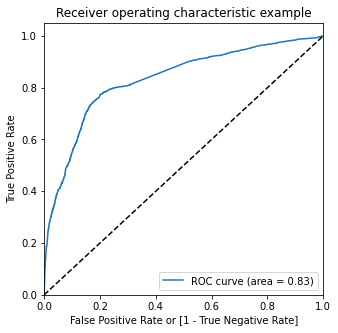

In [1031]:
# Constructing the ROC Curve from the function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [1032]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.630494,6676,1,1,1,1,1,1,1,1,0,0,0
1,1,0.415428,6138,0,1,1,1,1,1,0,0,0,0,0
2,1,0.961762,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.203132,3423,0,1,1,1,0,0,0,0,0,0,0
4,0,0.203132,6552,0,1,1,1,0,0,0,0,0,0,0


In [1033]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.410823  0.989895  0.055541
0.2   0.2  0.636567  0.902316  0.473521
0.3   0.3  0.792507  0.750737  0.818135
0.4   0.4  0.793308  0.699368  0.850943
0.5   0.5  0.778418  0.619368  0.876001
0.6   0.6  0.761287  0.523368  0.907259
0.7   0.7  0.741595  0.412632  0.943425
0.8   0.8  0.722382  0.314526  0.972617
0.9   0.9  0.684758  0.183158  0.992508


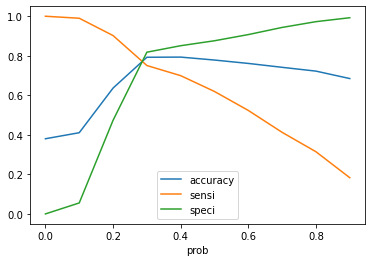

In [1034]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1035]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [1036]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.630494,6676,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.415428,6138,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.961762,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.203132,3423,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.203132,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [1037]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Lead Number','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Lead Number,final_Predicted,Lead_Score
0,1,0.630494,6676,1,63
1,1,0.415428,6138,1,42
2,1,0.961762,8650,1,96
3,0,0.203132,3423,0,20
4,0,0.203132,6552,0,20


In [1038]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.792507204610951

In [1039]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3167,  704],
       [ 592, 1783]], dtype=int64)

In [1040]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1041]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7507368421052631

In [1042]:
# Let us calculate specificity

TN / float(TN+FP)

0.8181348488762593

In [1043]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.18186515112374063


In [1044]:
# Positive predictive value

print (TP / float(TP+FP))

0.7169280257338159


In [1045]:
# Negative predictive value

print (TN / float(TN+ FN))

0.842511306198457


## Precision and Recall

In [1046]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3167,  704],
       [ 592, 1783]], dtype=int64)

##### Precision
TP / TP + FP

In [1047]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7169280257338159

##### Recall
TP / TP + FN

In [1048]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7507368421052631

#### Using sklearn utilities for the same

In [1049]:
# Importing precision_score and recall_score package from sklearn.metrics

from sklearn.metrics import precision_score, recall_score

In [1050]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7169280257338159

In [1051]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7507368421052631

### Precision and recall tradeoff

In [1052]:
# Importing the precision_score_curve package from sklearn.metrics

from sklearn.metrics import precision_recall_curve

In [1053]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 Name: Converted, Length: 6246, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6241    0
 6242    1
 6243    0
 6244    1
 6245    0
 Name: final_Predicted, Length: 6246, dtype: int64)

In [1054]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

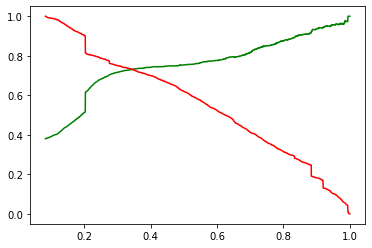

In [1055]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set

In [1056]:
#scaling test set

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_ Managment Courses,"Specialization_Banking, Investment And Insurance",Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference
7625,-0.397342,2.145058,-0.164140,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5207,0.277837,0.772700,0.876565,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2390,-1.072521,-0.885722,-1.204846,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4362,-0.397342,-0.451952,-0.164140,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1023,3.991321,-0.293028,1.396918,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8226,-0.059753,1.522449,0.356212,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3079,1.628195,-0.231328,2.957977,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
530,0.615426,-0.218240,1.396918,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7873,-1.072521,-0.885722,-1.204846,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5146,-0.059753,1.150379,0.356212,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [1057]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Student,What is your current occupation_Unemployed,Specialization_ Managment Courses,"Specialization_Banking, Investment And Insurance",Specialization_Media and Advertising,Lead Source_Olark Chat
7625,2.145058,0,0,1,1,0,0,0
5207,0.772700,0,0,1,1,0,0,0
2390,-0.885722,1,0,1,0,0,0,0
4362,-0.451952,0,0,1,1,0,0,0
1023,-0.293028,0,0,1,1,0,0,0


In [1058]:
X_test_sm = sm.add_constant(X_test)

####  Making predictions on the test set

In [1059]:
y_test_pred = res.predict(X_test_sm)

In [1060]:
y_test_pred[:10]

7625    0.797294
5207    0.460108
2390    0.882786
4362    0.178775
1023    0.206269
8226    0.662761
3079    0.217754
530     0.220248
7873    0.201813
5146    0.564878
dtype: float64

In [1061]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [1062]:
# Let's see the head

y_pred_1.head()

,0
7625,0.797294
5207,0.460108
2390,0.882786
4362,0.178775
1023,0.206269


In [1063]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1064]:
# Putting CustID to index

y_test_df['Lead Number'] = y_test_df.index

In [1065]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1066]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1067]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,7625,0.797294
1,1,5207,0.460108
2,1,2390,0.882786
3,0,4362,0.178775
4,0,1023,0.206269


In [1068]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1069]:
y_pred_final.head()

,Converted,Lead Number,Converted_prob
0,0,7625,0.797294
1,1,5207,0.460108
2,1,2390,0.882786
3,0,4362,0.178775
4,0,1023,0.206269


In [1070]:
# Rearranging the columns

y_pred_final = y_pred_final[['Lead Number','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [1071]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Lead Number,Converted,Converted_prob,Lead_Score
0,7625,0,0.797294,80
1,5207,1,0.460108,46
2,2390,1,0.882786,88
3,4362,0,0.178775,18
4,1023,0,0.206269,21


In [1072]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [1073]:
y_pred_final.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_Predicted
0,7625,0,0.797294,80,1
1,5207,1,0.460108,46,1
2,2390,1,0.882786,88,1
3,4362,0,0.178775,18,0
4,1023,0,0.206269,21,0


In [1074]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7890216579536968

In [1075]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1361,  323],
       [ 242,  752]], dtype=int64)

In [1076]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1077]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7565392354124748

In [1078]:
# Let us calculate specificity

TN / float(TN+FP)

0.8081947743467933

In [1079]:
# Precision Score

precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6995348837209302

In [1080]:
# Recall Score

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7565392354124748

In [1081]:
# Checking the Lead_Score of first 5 customers

y_pred_final.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_Predicted
0,7625,0,0.797294,80,1
1,5207,1,0.460108,46,1
2,2390,1,0.882786,88,1
3,4362,0,0.178775,18,0
4,1023,0,0.206269,21,0


# Summary

Model Accuracy on Train Data is 79%
Sensitivity of Train data is 75%
Specificity On Train data is 81%
 Model Accuracy on Test Data is 78%
Sensitivity of Test data is 75%
Specificity On Test data is 80%

Our Logistic Regression Model looks accurate and good enough when we compare the model on the train and test data set. We are getting the similar accuracy, Sensitivity and Specificity 
